In [1]:
#IMPORTANDO BIBLIOTECAS IMPORTANTES
import numpy as np
from math import atan
from math import cos
from math import sqrt
from math import sin
from math import acos
import matplotlib.pyplot as plt
from IPython.display import Image as img
from Modules.Read_Office import xlsread 
from Modules.Sama_Irai import calang,caldist

In [2]:
#DEFININDO AS COORDENADAS DA ESTACAO IRAI
irai = []
irailat = -27.18
irailong = -53.23
irai.append(irailat)
irai.append(irailong)
#print(f'As coordenadas da estação de Iraí, são {irai}°')

In [3]:
#DADOS DE PRECIPITACAO DA ESTACAO IRAI
iraiyr = []
iraianual = []
for coluna in xlsread('Irai(RS).xls',2):
    iraiyr.append(coluna[0])
    iraianual.append(coluna[19])
iraiyr = iraiyr[5:len(iraiyr)-2]
iraianual = iraianual[5:len(iraianual)-2]

In [4]:
#DEFININDO O VETOR DE COORDENADAS DA SAMA ASSIM COMO SUA INTENSIDADE NO TEMPO
j = 1961
samalat = []
samalong = []
samayr = []
samaint = []
for coluna in xlsread('Sama.XLS',0):
    samayr.append(coluna[0])
    samalong.append(coluna[1])
    samalat.append(coluna[2])
    samaint.append(coluna[3])
for i in range(len(samalat)):
    print(f'Ano {j} : {samalat[i],samalong[i],samaint[i]}')
    j +=1

Ano 1961 : (-26.07, -48.135, 24119.629)
Ano 1962 : (-26.145, -48.425, 24097.08978)
Ano 1963 : (-26.07, -48.57, 24074.8811)
Ano 1964 : (-26.07, -48.935, 24052.754)
Ano 1965 : (-26.07, -49.08, 24030.717)
Ano 1966 : (-26.215, -49.3, 23989.44876)
Ano 1967 : (-26.29, -49.445, 23948.05665)
Ano 1968 : (-26.215, -49.665, 23907.03747)
Ano 1969 : (-26.215, -49.81, 23866.10426)
Ano 1970 : (-26.29, -49.88, 23825.03241)
Ano 1971 : (-26.29, -50.175, 23793.18596)
Ano 1972 : (-26.29, -50.32, 23761.32641)
Ano 1973 : (-26.215, -50.535, 23729.48366)
Ano 1974 : (-26.29, -50.755, 23698.04548)
Ano 1975 : (-26.29, -50.9, 23666.17924)
Ano 1976 : (-26.29, -51.12, 23638.3856)
Ano 1977 : (-26.505, -51.485, 23610.99888)
Ano 1978 : (-26.435, -51.485, 23583.52956)
Ano 1979 : (-26.505, -51.555, 23556.54633)
Ano 1980 : (-26.435, -51.775, 23530.04272)
Ano 1981 : (-26.505, -51.92, 23497.43478)
Ano 1982 : (-26.505, -52.065, 23465.41334)
Ano 1983 : (-26.505, -52.065, 23433.95944)
Ano 1984 : (-26.505, -52.36, 23402.48808)

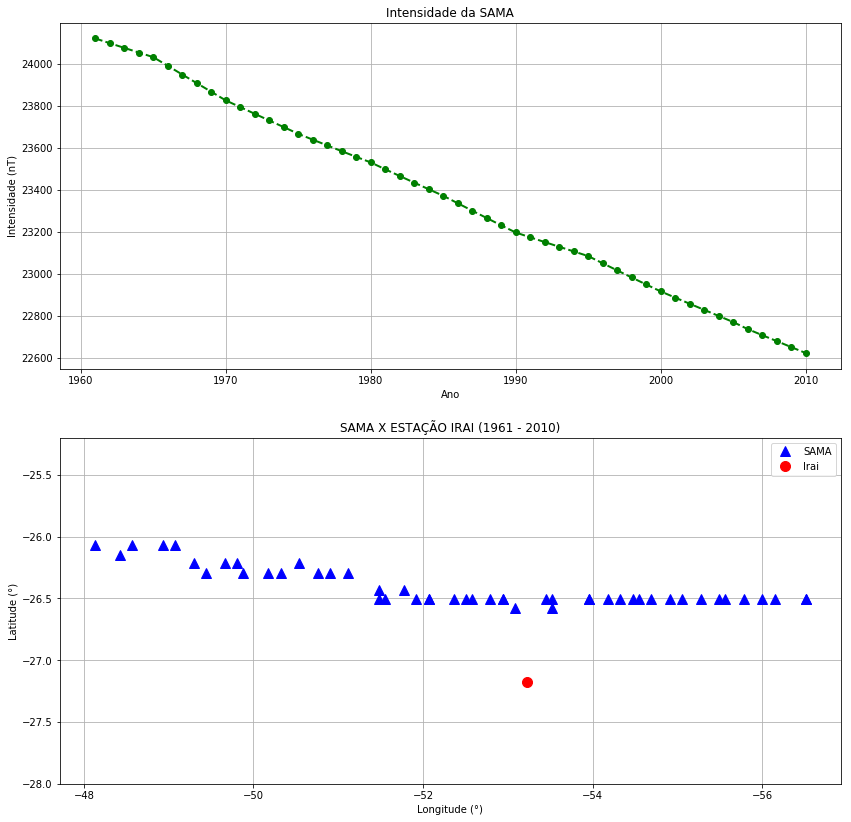

In [5]:
#PLOTANDO A ESTACAO IRAI E A SAMA, ASSIM COMO A SUA INTENSIDADE NO SEU CENTRO (1961 - 2010)
plt.figure(figsize=(14,14))
plt.subplot(2,1,1)
plt.plot(samayr, samaint, color='green', marker='.', linestyle='dashed', linewidth=2, markersize=12)
plt.grid()
plt.title('Intensidade da SAMA')
plt.xlabel('Ano')
plt.ylabel('Intensidade (nT)')
plt.subplot(2,1,2)
plt.plot(samalong, samalat, '^b', markersize = 10, label = 'SAMA')
plt.plot(irailong, irailat, 'or', markersize = 10, label = 'Irai')
plt.gca().invert_xaxis()
plt.legend()
plt.grid()
plt.ylim(-28,-25.2)
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title('SAMA X ESTAÇÃO IRAI (1961 - 2010)')
plt.show()

In [ ]:
#PLOTANDO A PRECIPITACAO NA ESTACAO IRAI - (1961 - 2010
'''print(f'ANO           MEDIA ANUAL')
for i in range(0,len(iraianual)):
    print(f'\n{iraiyr[i]}        {iraianual[i]}')'''
plt.figure(figsize=(12,8))
plt.plot(iraiyr,iraianual,color = 'red')
plt.title('Precipitação anual(mm)')
plt.xlabel('Ano')
plt.ylabel('Média (mm)')
plt.grid()
plt.show()

In [ ]:
#CALCULANDO AS DISTANCIAS ENTRE IRAI E A SAMA - d(A,B) = RT *acos(sin(latA)*sin(latB) + cos(latA)*cos(latB)*cos(LonA-lonB))
plt.figure(figsize=(12,10))
for i in range(0,len(samalat)):    
    #print(f'\n A distância distância da SAMA, na coordenada ({samalat[i]}°,{samalong[i]}°) para a estação de Irai é de {caldist(irailat,irailong,samalat[i],samalong[i])} Km.')
    plt.scatter(samayr[i],caldist(irailat,irailong,samalat[i],samalong[i]),marker = 'o')
plt.xlabel('Ano')
plt.ylabel('Distância (Km)')
plt.title('Distância entre a SAMA e a estação de Irai (Km)')
plt.grid()
plt.show()

In [ ]:
#CALCULANDO A DIRECAO DO VETOR IRAI-SAMA
plt.figure(figsize=(12,10))
for i in range(0,len(samalat)):
    #print(f'\n O ângulo entra a SAMA, na coordenada ({samalat[i]}°,{samalong[i]}°) e a estação de Irai é de {calang(irailat,irailong,samalat[i],samalong[i])}°.')
    plt.scatter(samayr[i],calang(irailat,irailong,samalat[i],samalong[i]),marker='o')
plt.grid()
plt.ylabel('Ângulo (°)')
plt.xlabel('Ano')
plt.title('Ângulo em relação ao eixo X do vetor Irai --> SAMA (°)')
plt.show()

In [ ]:
# FIGURA (PDF) CONTENDO AS IMAGENS DOS 4 DADOS (POSICAO,PRECIPITACAO,DISTANCIA,ANGULO)
plt.figure(figsize=(20,14))
plt.subplot(2,2,2)
plt.plot(iraiyr,iraianual,color = 'red')
#plt.title('Precipitação anual(mm)')
#plt.xlabel('Ano')
#plt.ylabel('Média (mm)')
for i in range(0,len(samalat)):    
    plt.plot(samayr[i],caldist(irailat,irailong,samalat[i],samalong[i]),'o')
#plt.ylabel('Distância (Km)')
#plt.xlabel('Ano')
#plt.title('Distância entre a SAMA e a estação de Irai (Km)')
plt.grid()
plt.show()